In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

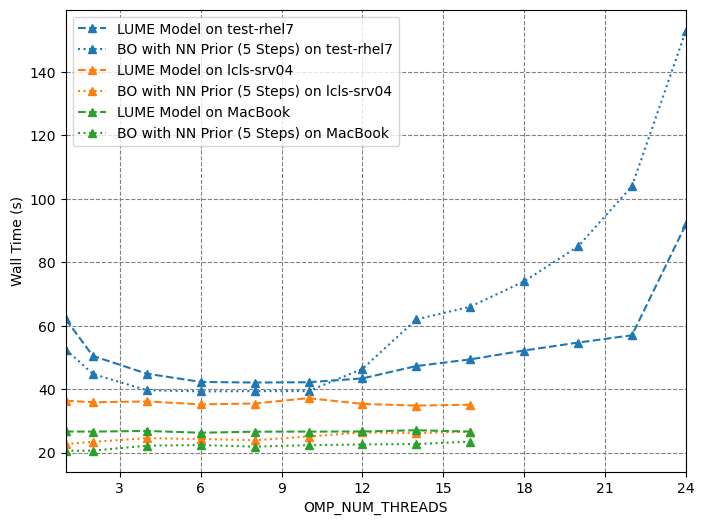

In [2]:
# stress test with varying OMP_NUM_THREADS
lume_threads = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
lume_times = [62.0, 50.5, 44.9, 42.3, 42.1, 42.2, 43.4, 47.3, 49.4, 52.2, 54.7, 57.0, 92.0]

bo_threads = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
bo_times = [52.5, 44.8, 39.7, 39.3, 39.4, 39.4, 46.4, 62.0, 66.0, 74.0, 85.0, 104.0, 153.0]

scale_macbook = 3.0  # based on CPU benchmarks for "Apple M1 Pro" and "Intel Xeon X5650"
lume_threads_macbook = [1, 2, 4, 6, 8, 10, 12, 14, 16]
lume_times_macbook = [8.89, 8.88, 8.95, 8.76, 8.87, 8.88, 8.89, 9.02, 8.88]

bo_threads_macbook = [1, 2, 4, 6, 8, 10, 12, 14, 16]
bo_times_macbook = [6.87, 6.88, 7.40, 7.47, 7.30, 7.45, 7.53, 7.57, 7.83]

scale_srv04 = 1.3  # based on CPU benchmarks for "Intel Xeon X5650" and "Intel Xeon E5-2637 v3"
lume_threads_srv04 = [1, 2, 4, 6, 8, 10, 12, 14, 16]
lume_times_srv04 = [28.0, 27.6, 27.8, 27.1, 27.3, 28.6, 27.2, 26.8, 27.0]

bo_threads_srv04 = [1, 2, 4, 6, 8, 10, 12, 14, 16]
bo_times_srv04 = [17.5, 18.0, 18.9, 18.7, 18.4, 19.3, 20.3, 20.1, 20.5]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(lume_threads, lume_times, "^--C0", label="LUME Model on test-rhel7")
ax.plot(bo_threads, bo_times, "^:C0", label="BO with NN Prior (5 Steps) on test-rhel7")
ax.plot(lume_threads_srv04, [x * scale_srv04 for x in lume_times_srv04], "^--C1", label="LUME Model on lcls-srv04")
ax.plot(bo_threads_srv04, [x * scale_srv04 for x in bo_times_srv04], "^:C1", label="BO with NN Prior (5 Steps) on lcls-srv04")
ax.plot(lume_threads_macbook, [x * scale_macbook for x in lume_times_macbook], "^--C2", label="LUME Model on MacBook")
ax.plot(bo_threads_macbook, [x * scale_macbook for x in bo_times_macbook], "^:C2", label="BO with NN Prior (5 Steps) on MacBook")
ax.set_xlabel("OMP_NUM_THREADS")
ax.set_ylabel("Wall Time (s)")
ax.legend(loc="upper left")
ax.set_axisbelow(True)
ax.grid(color="gray", linestyle="dashed")
ax.set_xlim(min(lume_threads), max(lume_threads))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

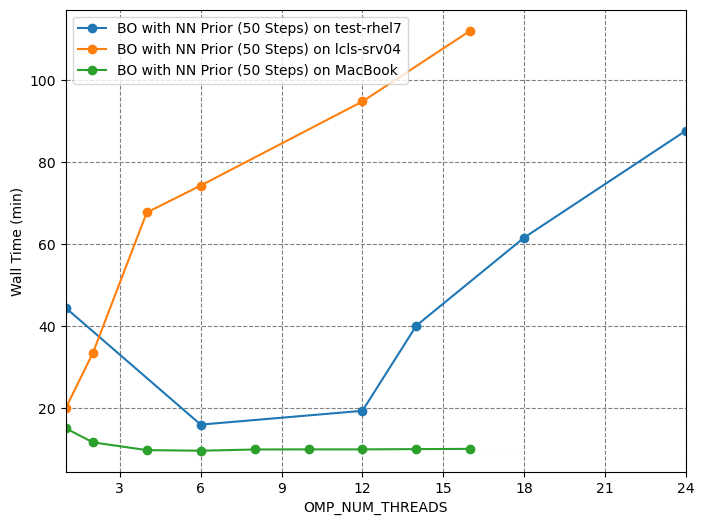

In [3]:
# offline test with varying OMP_NUM_THREADS
bo_threads_50 = [1, 6, 12, 14, 18, 24]
bo_times_50 = [44.42, 16.02, 19.38, 40.13, 61.57, 87.63]

scale_srv04 = 1.3  # based on CPU benchmarks for "Intel Xeon X5650" and "Intel Xeon E5-2637 v3"
bo_threads_50_srv04 = [1, 2, 4, 6, 12, 16]
bo_times_50_srv04 = [15.48, 25.73, 52.07, 57.12, 72.87, 86.13]

scale_macbook = 3.0  # based on CPU benchmarks for "Apple M1 Pro" and "Intel Xeon X5650"
bo_threads_50_macbook = [1, 2, 4, 6, 8, 10, 12, 14, 16]
bo_times_50_macbook = [5.03, 3.90, 3.27, 3.22, 3.32, 3.33, 3.33, 3.35, 3.37]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(bo_threads_50, bo_times_50, "o-C0", label="BO with NN Prior (50 Steps) on test-rhel7")
ax.plot(bo_threads_50_srv04, [x * scale_srv04 for x in bo_times_50_srv04], "o-C1", label="BO with NN Prior (50 Steps) on lcls-srv04")
ax.plot(bo_threads_50_macbook, [x * scale_macbook for x in bo_times_50_macbook], "o-C2", label="BO with NN Prior (50 Steps) on MacBook")
ax.set_xlabel("OMP_NUM_THREADS")
ax.set_ylabel("Wall Time (min)")
ax.legend(loc="upper left")
ax.set_axisbelow(True)
ax.grid(color="gray", linestyle="dashed")
ax.set_xlim(min(lume_threads), max(lume_threads))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

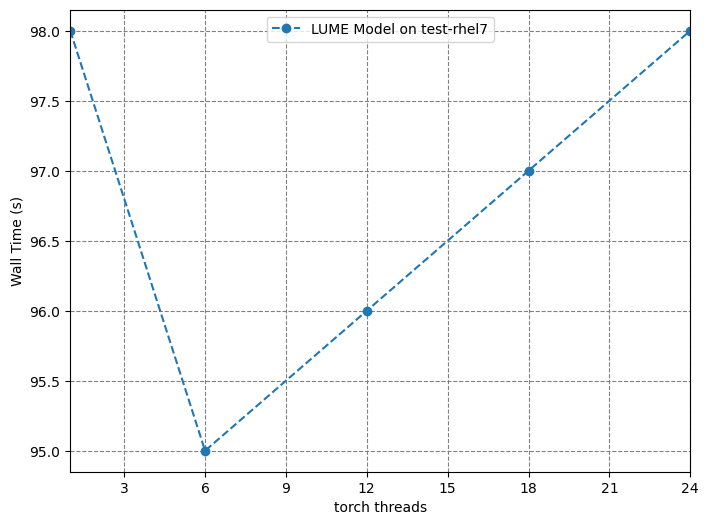

In [4]:
# stress test with varying torch threads
lume_torch_threads = [1, 6, 12, 18, 24]
lume_torch_times = [98.0, 95.0, 96.0, 97.0, 98.0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(lume_torch_threads, lume_torch_times, "o--C0", label="LUME Model on test-rhel7")
ax.set_xlabel("torch threads")
ax.set_ylabel("Wall Time (s)")
ax.legend(loc="upper center")
ax.set_axisbelow(True)
ax.grid(color="gray", linestyle="dashed")
ax.set_xlim(min(lume_torch_threads), max(lume_torch_threads))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))